In [12]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict, Annotated, Literal
from dotenv import load_dotenv
import os
from langchain_google_genai import ChatGoogleGenerativeAI
from langchain_core.messages import SystemMessage,HumanMessage,BaseMessage
from langgraph.checkpoint.memory import MemorySaver

In [4]:

from langgraph.graph.message import add_messages

class ChatState(TypedDict):

    messages: Annotated[list[BaseMessage], add_messages]

In [5]:
model_name = "gemini-2.5-flash"  # or another available model
llm=ChatGoogleGenerativeAI(model=model_name, api_key=os.getenv("GOOGLE_API_KEY"))

In [6]:
def Chat_node(state: ChatState):
  # user query for the state 
  messages = state["messages"]
  # sending to the llm 
  response = llm.invoke(messages)
  # returning the response as a message
  return {"messages": [response]}

In [14]:
checkpointer=MemorySaver()
graph = StateGraph(ChatState)

graph.add_node("Chat_node", Chat_node)

graph.add_edge(START, "Chat_node")
graph.add_edge("Chat_node", END)

chatbot=graph.compile(checkpointer=checkpointer)

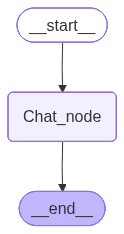

In [8]:
chatbot

In [9]:

initial_state = {
    'messages': [HumanMessage(content='What is the capital of india')]
}

chatbot.invoke(initial_state)['messages'][-1].content

'The capital of India is **New Delhi**.'

In [16]:
thread_id="1"

while True:
  user_message=input("type here :")
  print("user :",user_message)

  if user_message.strip().lower() in ['exit','quit',"bye"]:
    break

  config={"configurable":{"thread_id":thread_id}}
  response = chatbot.invoke({"messages":[HumanMessage(content=user_message)]},config=config)

  print("AI :", response['messages'][-1].content)

user : hi my name is yas h
AI : Hi Yas H, it's nice to meet you! How can I help you today?
user : hwat name and what is cuurent date 
AI : I don't have a name, I am a large language model, an AI.

The current date is **Tuesday, October 24, 2023**.
user : what is my name 
AI : Your name is **Yas H**.
user : exit


In [17]:
chatbot.get_state(config=config)

StateSnapshot(values={'messages': [HumanMessage(content='hi my name is yas h', additional_kwargs={}, response_metadata={}, id='77b297bf-7384-491e-ac2c-679ddd5126d2'), AIMessage(content="Hi Yas H, it's nice to meet you! How can I help you today?", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash', 'safety_ratings': [], 'model_provider': 'google_genai'}, id='lc_run--019b3181-abba-7002-9083-a9ed6d316455-0', usage_metadata={'input_tokens': 7, 'output_tokens': 401, 'total_tokens': 408, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 382}}), HumanMessage(content='hwat name and what is cuurent date ', additional_kwargs={}, response_metadata={}, id='a325905a-f0eb-481a-b73a-9c51a460106f'), AIMessage(content="I don't have a name, I am a large language model, an AI.\n\nThe current date is **Tuesday, October 24, 2023**.", additional_kwargs={}, response_metadata={'finish_reason': 'STOP', 'model_name': 'gemini-2.5-flash